# Chapter 06. 머신러닝 프로세스

요약: 트레이딩을 위한 지도 / 비지도 머신러닝</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;이 책에서 앞으로 사용할 모델의 범주
- 회귀, 분류 for cross-section, time-series, panel data
- 비선형 트리 기반 모델, 일반화 가법 모델(Generalized additve models)
- Random forest, Gradient boosting 포함한 앙상블 모델
- 차원 축소, 클러스트링을 위한 비지도 선형 및 비선형 방법
- RNN, CNN 등 신경망 모델
- Reinforcement learning 모델

</br>
이러한 모델들을 사용하여 거래 전략, 포트폴리오 최적화, 전략 성과 평가 방법 다룰 것</br>
회귀 vs 분류, 예측 vs 추론

---------------------------------------------------

cross-section, time-series, panel data란?

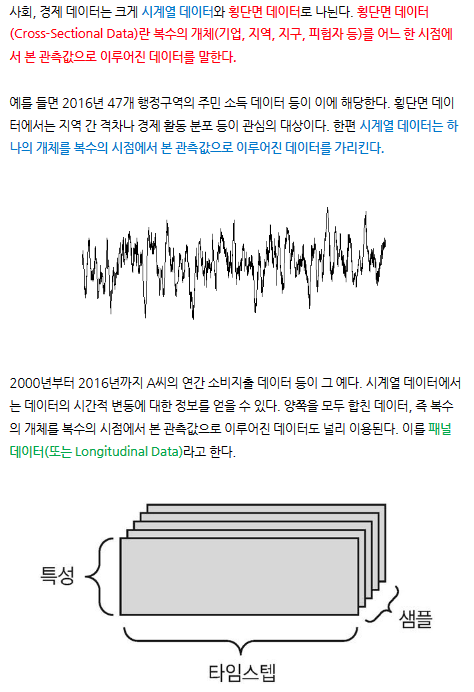

---------------------------------------------------

※ 머신러닝에서 예측이 뭐고, 추론이 뭘까?

예측: 결과를 중점으로 아는 것</br>
추론: 원인과 결과의 인과관계를 중점으로 아는 것</br>
이해가능성(interpretability)과 유연성(flexibility)의 관계

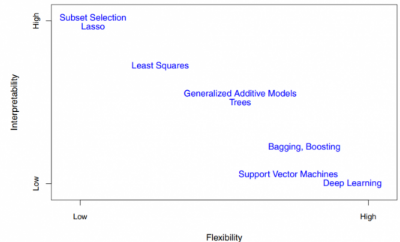

추론을 하고 싶은 땐 이해가능성이 높은 선형 회귀 모델을</br>
예측을 하고 싶은 때는 이해 가능성이 낮아도 되므로 SVM, Boosting 같은 모델을 채택

참고 논문: https://vitalflux.com/machine-learning-inference-prediction-difference/

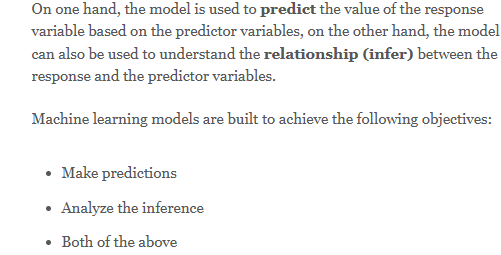

*일반적인 선형회귀분석은 모형의 단순성으로 인해 해석과 추론이 쉽다는 장점이 있으나 예측력이라는 중요한 부분에서 한계

---------------------------------------------------

6장에서는 아래 내용을 다룬다는데...(언급만 하였다...)
- 데이터 지도 및 비지도 학습
- 회귀 / 분류를 위한 지도 학습 모델 훈련, 평가
- 편향, 분산 trade-off가 예측 성과로의 영향
- 과대적합 오차를 진단하고 다루는 방법
- 시계열 데이터 활용하여 하이퍼파라미터 최적화 및 교차 검증 방법
- 표본 외 테스트 수행시 금융 데이터가 추가적인 주의를 필요로하는 이유

---------------------------------------------------

## 6.1 데이터로부터 머신러닝이 작동하는 방법

머신러닝은?
- ML은 데이터의 의미있는 패턴을 자동으로 인식</br>
- 문제를 풀기 위해 의사결정을 위한 규칙이 프로그램 및 코드화 되는 것이 아니라 데이터로부터 학습한다는 것</br>
- 경험 = 훈련데이터

**도전 과제: 알고리듬을 작업에 매칭**

새로운 데이터에 대해서도 일반화 될 수 있도록 훈련 데이터에서 의미있는 패턴을 인식할 수 있도록 학습

알고리듬이 학습할 수 있는 패턴의 형태는 알고리듬의 함수들을 포함하는 가설 공간(hypothesis space)의 크기에 의해 제한(여기서 가설은 문제와 답을 이어준다는 의미)</br>

https://eair.tistory.com/5

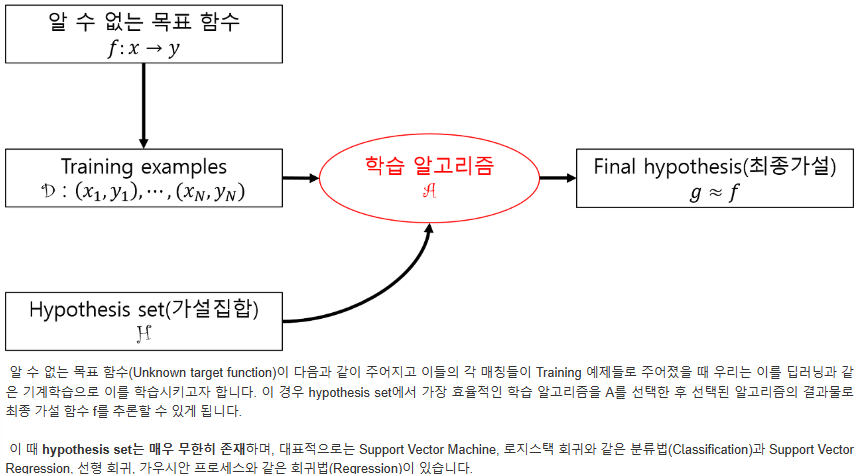

알고리듬이 일반화할 때 귀납적 편향(inductive bias) 주의: 편향된 데이터, 잘못된 학습 등으로 인한...

학습 모델 알고리듬은 일반화를 위해 작업 도메인에 대한 사전 지식을 사용해 특정 작업(지도, 비지도, 강화학습 등)에 맞춰야...</br>
예. tcr vs gcr

No free-lunch theorem: 보편적인 학습 알고리듬은 없다

**지도학습: 예제에 의한 학습**

학습 과정을 지도하는 결과 변수가 존재

출력 변수(output variable) = Label = Target = Outcome = 내생 변수(endogenous variable) = 좌변 변수(left-hand side variable) = y

입력 데이터 = 특성(Feature), 외생 변수(exogenous variable) = 우변 변수(right-hand side variable) = x

모델은 표본에서 입력, 출력 관계를 학습한 것, 근사 함수

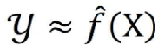

이 함수는
- 통계적 연관 관계 설명
- 표본을 넘어선 관심 타깃 변수들 간의 인과관계 추론
- 새로운 입력 데이터에 대한 출력 예측

복잡한 모델: </br>
암시적인 관계를 표현할 수 있는 유연한 부분을 포함하지만</br>
훈련 표본에 특별한 random noise를 학습할 가능성(과대적합 = overfitting)</br>
복잡한 모델은 특성들간의 관계를 설명하기가 어려움

너무 간단한 모델:</br>
복잡한 신호를 놓치고 편향된 결과</br>
가정이 잘못됨</br>
예. 비선형인데 선형 모델 적용

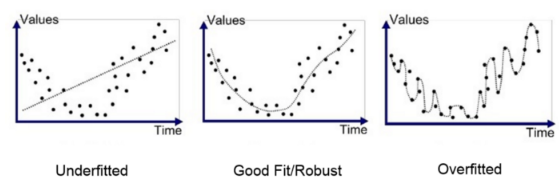

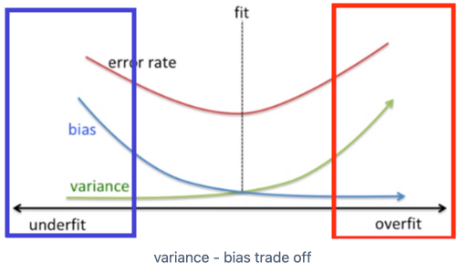

*참고: 모델 복잡도에 따른...

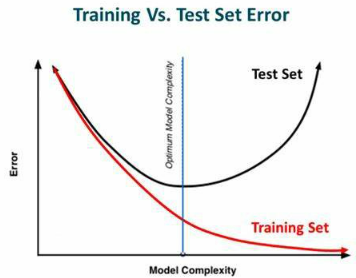

*참고: 한 모델에서 하이퍼파라미터 튜닝에 따른 모델 표현 수용력

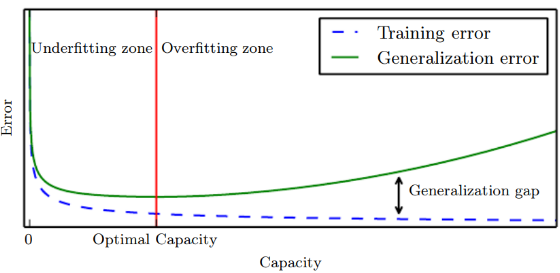

※ 편향-분산 트레이드 오프(bias-variance trade-off):</br>
- 편향: 학습 알고리즘에서 잘못된 가정에 의한 오차, 과소 적합, 특징과 결과물과의 적절한 관계를 놓침
- 분산: 학습 데이터에 내재된 작은 변동에 의한 오차, 큰 노이즈 조차 모델링에 포함, 과적합

타깃은 센터인데...

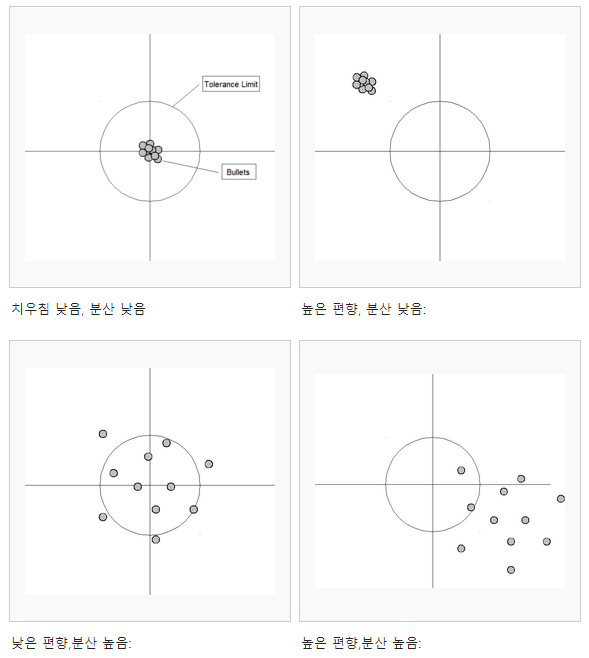

**비지도학습: 유용한 패턴의 발견**

특성만을 관찰</br>
관측 간의 공통성, 클러스터를 식별 or 관련 정보를 포착하는 압축된 요약 표현을 얻고자 특성을 변환

진정한 참에 대해 결과를 평가할 수 없고, </br>
품질은 관찰자의 판단에 의존</br>
차원 축소가 더 나은 예측에 기여한다는 것과 같이 결과와 연계하여 평가도 가능

<비지도 학습의 트레이딩 사용 사례: 리스크 관리에서 텍스트 처리까지>
- 유사한 리스크와 수익률 성격을 지닌 자산들을 그룹화(ch13. hierarchical risk parity)
- 주성분 분석(ch13), 오토인코더(ch19) 활용한 고성과를 내는 증권의 적은 수의 리스크 팩터 찾기
- 일련의 문서에서 중요한 측면을 포함하는 잠재적인 주제 식별(ch14)

요약하자면 트레이딩 분석에서는 클러스터 식별, 데이터 차원 축소를 주로 적용한다...

<클러스터링 알고리듬: 유사한 관측을 찾는 것></br>
클러스터링:</br>
similarity로 데이터 특성 식별</br>
많은 데이터를 적은 수 클러스트 할당하여 데이터 세트 요약</br>
클러스터 내 데이터 밀접하게 관련</br>
그룹 생성 과정과 이들을 유사하게 만드는 팩터에 대한 가정에 따라 방법이 다양
- k-mean clustering: 데이터 k 클러스터에 하나에 포함
- Gaussian mixture models: 데이터는 여러 다변량 정규 분포 중 하나에 의해 생성
- Density-based clusters: 클러스터는 임의의 모양, 근접하는 데이터 포인트의 최소 개수 존재에 의해서만 정의
- Hiarchical clusters: 데이터는 순차적으로 더 작은 수의 클러스터에 결합되면서 형성되는 상위 그룹에 포함

※ 주요 클러스터링 알고리즘 설명</br>
https://saint-swithins-day.tistory.com/81</br>
Gaussian Mixture model: https://studying-haeung.tistory.com/14</br>
DBSCAN: https://bcho.tistory.com/1205?utm_source=dable</br>
Hiarchinal clusters: https://bcho.tistory.com/1204</br>


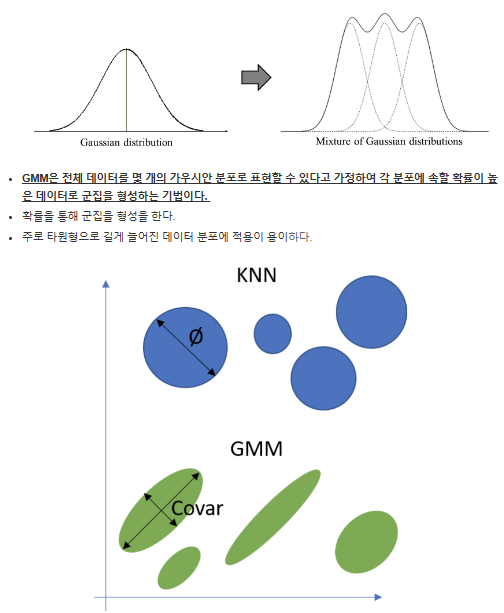

<차원 축소: 정보의 압축></br>
원천 데이터에 포함된 가장 중요한 정보를 포착하는 새로운 데이터 산출</br>
더 적은 특성을 이용해 원래의 정보를 표현하는 것을 목적으로 데이터 변환
- 주성분 분석(Principal Component Analysis): 기존 데이터 세트의 분산을 가장 많이 포착하는 **선형** 변환을 찾음</br>
- Manifold 학습: 데이터의 저차원 표현을 산출하는 비선형 변환을 찾음
- 오토인코더: 신경망을 이용해 정보 손실을 최소화하면서 데이터를** 비선형적**으로 압축

※ 주성분 분석

https://diseny.tistory.com/entry/R-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D

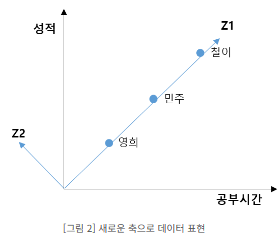

- 공부시간, 성적 축으로 각각 분산이 존재</br>
- 새로운 변수 Z1, Z2 축으로 나타낼 수 있는데 Z2축으로는 분산이 매우 작기 때문에 Z1축으로만 데이터를 설명할 수 있음</br>
- 결국 Z1 하나의 변수로 축약 가능</br>
- Z1: 첫번째 주성분, Z2: 두번째 주성분

※ Manifold 학습

https://kh-mo.github.io/notation/2019/03/10/manifold_learning/</br>
Manifold: 데이터가 있는 공간

고차원 상에서는 가까운 데이터를 나타내보면 실제로 의미상으로 가깝지 않은 걸 볼 수 있다.</br>
반면 저차원을 기준으로 가까운 데이터를 보면 의미상으로 보다 가까움을 알 수 있다.



※오토인코더

https://velog.io/@jochedda/%EB%94%A5%EB%9F%AC%EB%8B%9D-Autoencoder-%EA%B0%9C%EB%85%90-%EB%B0%8F-%EC%A2%85%EB%A5%98

이후 chapter에서 Topic Modeling, Word2vec feature extraction for NLP 등에서 비지도 학습 다룰 예정

**강화학습**

환경에 의해 주어진 정보를 기반으로 **매 타임스텝에서** 행동을 선택하는 에이전트에 초점</br>
에이전트는 관측치를 기반으로 시간에 걸쳐 가장 큰 보상을 산출하는 행동을 선택하는 것을 목적, 동적, 상호작용적</br>
학습의 시행착오 접근법</br>
과걱 확실한 보상을 산출했던 행동 경로의 활용(exploitation)과 미래에 보상을 증가시킬 수 있는 새로운 행동의 exploration간의 trade-off 관리 필요</br>
동적 시스템 이론과 불완전한 정보를 가진 마르코프 결정 이론의 최적 제어를 이용해 에이전트의 학습을 최적화</br>
결과가 시간이 지나야만 수집 가능하게 되는 상호작용 설정에 적합, 에이전트가 새로운 경험을 획득함에 따라 학습이 연속 방식으로 진행

https://davinci-ai.tistory.com/31

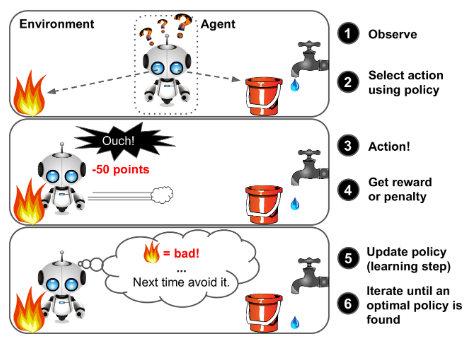

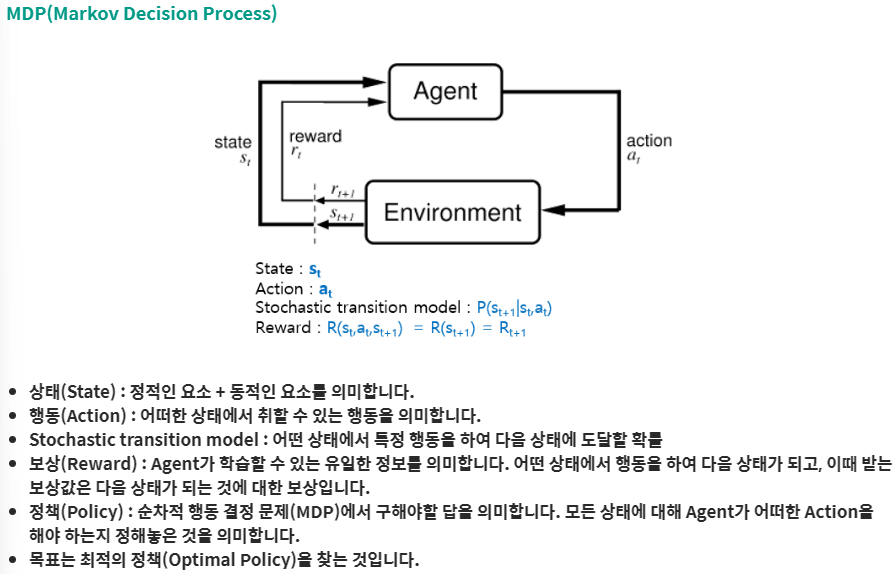

딥러닝을 사용해 행동, 환경, 미래 보상 사이의 함수 관계를 근사화

불확실하고 동적인 환경에서 수익 최대화 에이전트의 모델이 금융시장과 상호작용하는 투자자 또는 트레니딩 전략과 유사</br>
알고리듬 트레이딩에 적합(ch21)

## 6.2 머신러닝 워크플로

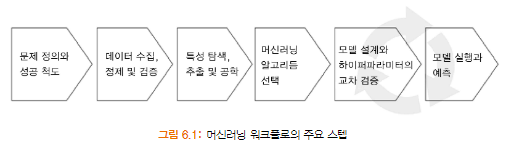

1. 문제 및 타깃 성공 척도 정의
2. 데이터 수집, 가공
3. Feature extraction and engineering
4. 머신러닝 모델 선택
5. 모델 훈련, 테스트
6. 모델 실행, 예측

https://jiwonpp.github.io/datascience/mlr-houeprice/

##### 6.2.1 문제의 구성: 목적과 성과 측정

추론과 예측은 목적을 잘 달성했는가를 평가하는 척도로 사용</br>
문제의구성 구분
- 변수간 연관관계 또는 인과관계를 식별하기위한 통계적 추론
- 트레이딩 신호를 산출하고자 결과를 예측
- 예측 모델 성격: 연속 출력 변수는 회귀, 범주형 변수는 분류, 순서가 있는 범주형 변수는 순위 문제
- 주어진 문제 구성: 수익률을 예측하는 회귀, 미래 가격 방향성 예측하는 이진 분류, 주식 수익률 분위와 같은 멀티클래스 성과 분류

<예측 대 추론> </br>
지도학습에 의해 산출된 함수 관계는
**결과에 대한 추론**과 **입력에 대한 출력을 예측**하는데 사용</br>
알고리듬 트레이딩의 경우
- 수익률의 리스크 팩터에 대한 인과적, 통계적 의존성 추정(어떤 관측이 리스크 팩터의 실제적인 영향이 아니라 얼마나 잡음에 기인한 것인지 평가)
- 수익률과 가격을 예측 혹은 트레이딩 신호로 전환될 수 있는 리스크 팩터를 예측

통계적 추론:</br>
- 모집단의 기저 확률 분포의 파라미터에 대해 표본 데이터에서 결론을 이끌어 내는 것
- 잠재적 결론은 개별 변수 분포 특성이나 변수 간 수치적 관계 유무 및 강도에 대한 가설 검증 포함
- 척도의 점추정, 구간 추정 포함
- 의사결정 트리, 앙상블 모델, 신경망 등 모델은 예측 작업에 탁월
- 랜덤 포레스트는 통계적 추론을 위한 프레임워크로 명성
- 추론은 원래 데이터를 생성했던 프로세스에 대한 가정에 따라 달라진다?

※랜덤포레스트</br>
https://injo.tistory.com/30</br>
https://velog.io/@chanhee-kang/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest

**인과 추론: 상관관계는 인과를 의미하지 않는다.**

"가장 간단한 예로 아이스크림의 판매량과 상어에 의해 살해당하는 사람의 수 간에는 높은 상관계수가 있다고 한다. 이 상관관계는 더위라는 covariable 때문으로, 더우면 바닷가를 찾는 사람이 많고, 동시에 아이스크림의 판매량 또한 증가하기에 존재하는 것이다. 더위라는 변수를 그대로 둔 채 아이스크림 판매를 규제해봐야 상어에 습격당하는 사람의 수가 줄지는 않을 것이다. 오히려 아이스크림으로 더위를 해소하지 못한 사람들이 바닷가로 더 몰려가 상어에 습격당하는 사람이 더 많아질 수도 있다. 이렇듯 상관관계는 인과관계를 의미하지 않는다."`

"사람의 생일과 학습성취도 사이에는 유의미한 상관관계가 있다. 이런 자료를 가지고 사주팔자의 과학성이 증명되었다고 말하는 사람들이 꽤 있다. 하지만 이 상관관계의 가장 큰 요인은 학교에 동시에 입학하는 아이들 간 생일의 차이다. 한 학년의 아이들의 생일은  364일이나 차이가 날 수 있는데, 더  빨리 태어난 아이는 당연히 신체적, 정신적인 발달이 통계적으로 더 빠를 수밖에 없고, 학습성취도 또한 통계적으로 더 높을 수밖에 없다. 출발선이 더 앞에 있기에 꾸준히 더 잘할 가능성도 높다. 따라서 이 상관관계는 오히려 사주팔자라는 것의 신뢰를 반증한다. 학교가 3월이 아닌 9월에 개학하면 생일이 운명에 미치는 영향이 달라진다는 말이기 때문이다"

인과 추론(Causal inference)의 목적: 특정 입력값이 특정 출력값을 의미하는 **관계를 식별**하는 것</br>
예. 다른 변수 고정시 일련의 특정 매크로 변수들이 자산 가격을 특정 방향으로 움직이게 하는 관계 식별


<회귀: 인기있는 손실 함수와 오차 척도>

regression problem은 연속 변수를 예측하는 것이 목적</br>
손실함수, 오차척도
- 평균제곱근 오차(RMSE)
- 평균 제곱근 로그 오차(RMSEL): 타깃이 지수적으로 증가할 때 적합
- 평균 절대 오차(MAE),중앙값 절대 오차(MedAE): 손실 대칭적, 큰 오차에 더 큰 가중치를 주지 않음, MedAE는 특이값에 민감하지 않음
- 설명된 분산 점수(explained variance score)
- R2 score, 결정 계수(coefficient of determination)

※ MSE, MAE, Cross-Entropy</br>
https://velog.io/@gktnals108/%EC%86%90%EC%8B%A4-%ED%95%A8%EC%88%98Loss-Function

※RMSEL</br>
https://ahnjg.tistory.com/90</br>
(마지막 부분만 참고...)

※ 결정계수 개념 설명</br>
https://diseny.tistory.com/entry/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98R2%EC%9D%98-%EC%9D%B4%ED%95%B4

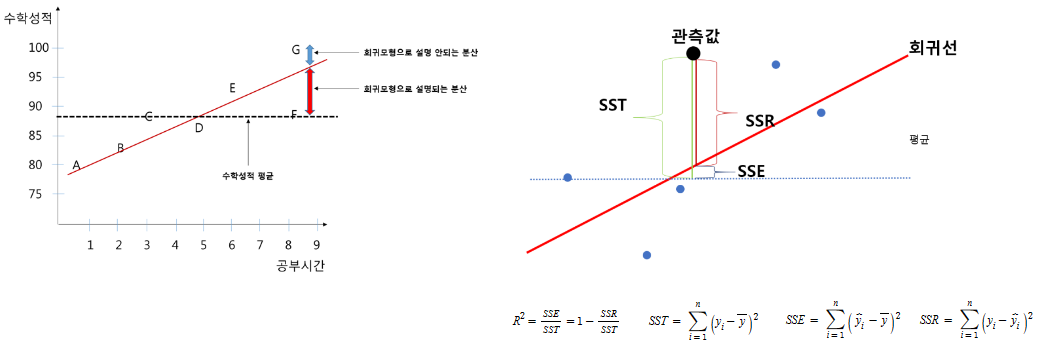

손실 함수, sklearn에서 임포트될 수 있는 메트릭 모듈

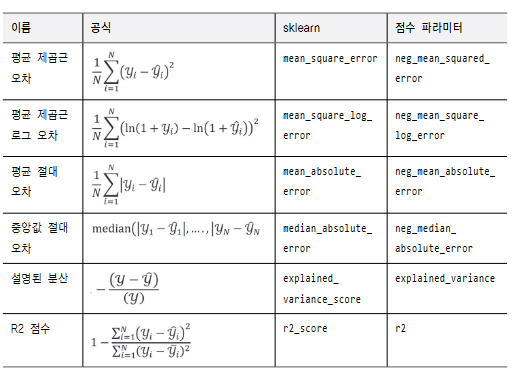

주택 가격 회귀에 대한 다양한 오차 척도

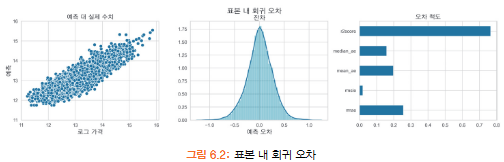

<분류 문제: 혼동 행렬의 이해>

https://diseny.tistory.com/entry/%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACconfusion-matrix?category=906035

categorical outcome variable</br>
어떤 관측이 특정 클래스에 속하는가를 나타내는 점수로 산출하고 특정 임계값을 적용하여 실제 예측으로 전환

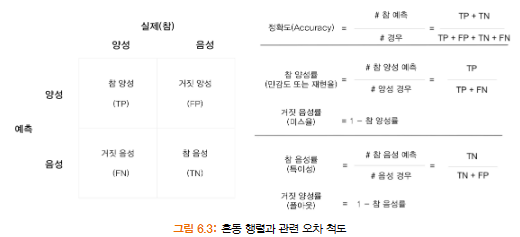

음성을 양성으로 구별하는데 사용되는 임계값은 최적화되어야할 결정 변수</br>
정확한 예측과 부정확한 예측의 비용과 편익을 고려</br>
모든 것이 동일하다면 임계값이 낮을수록 양성 예측 많아지고 거짓 양성률 높아짐

**ROC는 곡선 아래 면적을 특징짓는다**

https://diseny.tistory.com/entry/ROC-%EA%B3%A1%EC%84%A0-%EC%95%84%EC%A3%BC-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

https://huidea.tistory.com/178

https://angeloyeo.github.io/2020/08/05/ROC.html

ROC(Receiver Operating Characteristics) curve: 참 양성률(True Positive Rate)과 거짓 양성률(False Positive Rate)을 계산 및 시각화

AUC(Area Under the Curve): ROC 그래프 아래 면적, 0.5~1사이,

**정밀도-재현율 곡선**

오차 척도 간 트레이드오프 시각화
- 재현율(Recall): 주어진 임계값에 대해 양성으로 예측하는 클래스 멤버의 실제 양성 비중 측정
- 정밀도(Precision): 양성 예측 중 참인 비중

재현율 임계값이 낮을수록 증가 정밀도는 감소</br>
F1점수: 주어진 임계값에 대한 정밀도와 재현율의 조화 평균

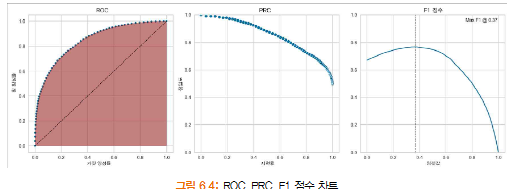

※ROC curve vs R-R curve</br>
https://nanunzoey.tistory.com/entry/ROC-%EA%B3%A1%EC%84%A0-vs-P-R-%EA%B3%A1%EC%84%A0</br>
https://velog.io/@jiyeong3141592/ROC%EA%B3%A1%EC%84%A0-vs-P-R%EA%B3%A1%EC%84%A0

##### 6.2.2 데이터의 수집과 준비

ch2, ch3 대체 데이터 소스

빠른 탐색 및 반복 시행을 위해 빠른 접근을 허용하는 포맷이 좋음</br>데이터 포맷은 HDF와 parquet 포맷 권장</br>
아파치 스파크: 여러 머신에 분산처리 요구하는 데이터에 적합

##### 6.2.3 특성 탐험, 추출, 특성 공학

개별 변수 분포 및 결과와 특성 간의 관계 이해 → 알고리듬 선택의 기반

시각화(그래프, 산점도 등), 수치적 평가(spearman rank correlation coefficient 등), 비선형 이론 척도(mutual information 등)</br>
EDA, Feature engineering(도메인 지식, 통계학 등 여러 정보 동원), outlier detection, 함수 변환, 비지도학습을 포함하는 여러 변수 조합

<정보 이론을 활용한 특성 평가>

특성과 결과 간의 상호 정보량(Mutual Information)은 두 변수 간의 상호 의존성 척도</br>
확률 변수에 포함된 정보의 양을 계량

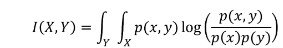

##### 6.2.4 ML 알고리듬 선택

##### 6.2.5 모델 설계와 조정

일반화 오차의 추정에 기반을 두고 모델 복잡성 진단, 관리

<편향과 분산의 트레이드 오프>

예측 오차는</br>
- 축소 불가능한 부분: 관련 변수 부재, natural variation, measurement error에 의한 random variation
- 축소 가능한 부분: 편향과 분산에 기인한 오차

편향에 기인한 에러인지, 분산에 기인한 에러인지...(앞서 설명)

<과소적합 대 과대적합: 시각적 예제>

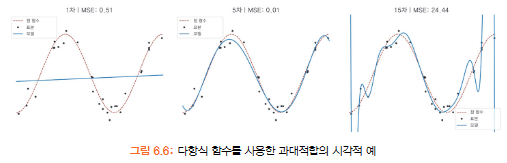

<편향 분산 트레이드 오프를 다루는 방법>

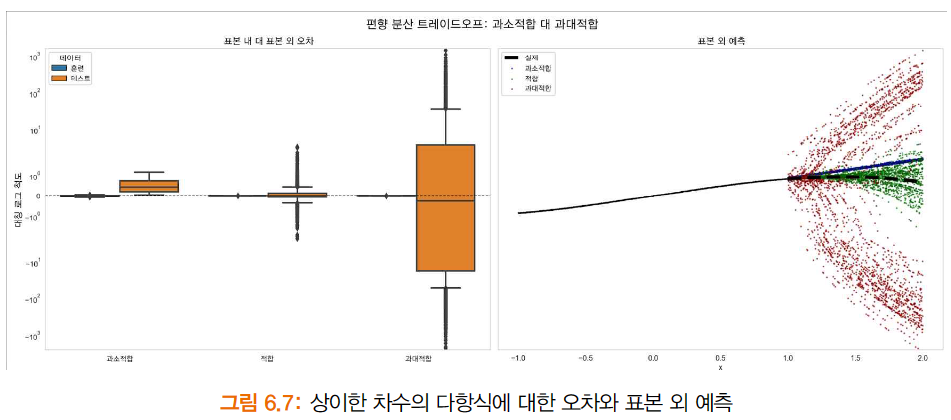

<학습 곡선>

데이터 세트의 크기에 따라 훈련과 테스트 오차가 어떻게 되는가를 그래프로...

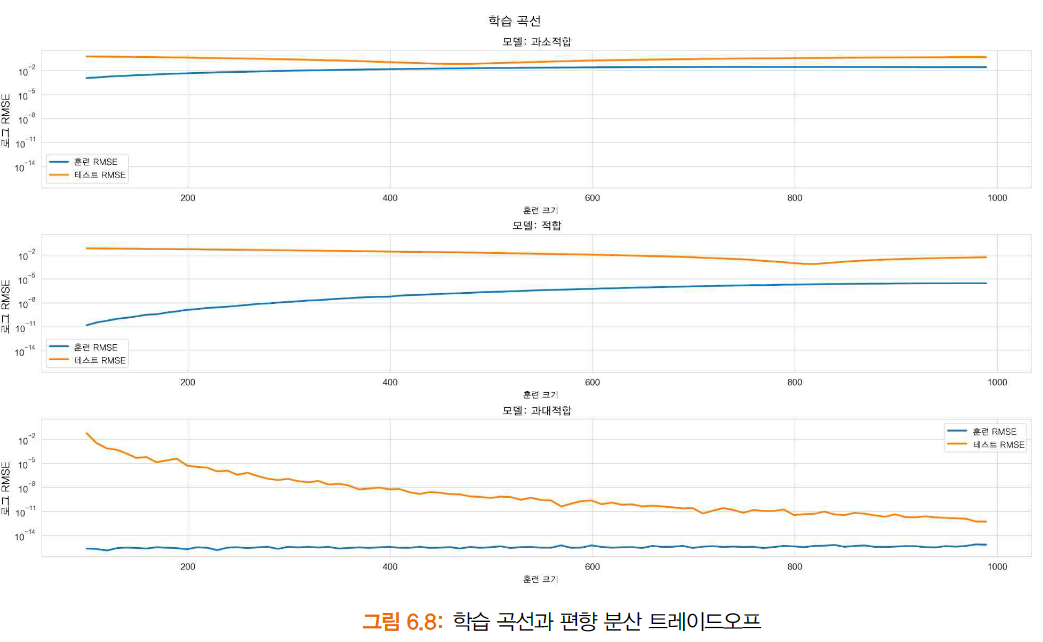

##### 6.2.6 모델 선택을 위한 교차 검증의 활용

새로운 데이터가 주어졌을 때 가장 낮은 예측 오차를 산출하는 모델 식별

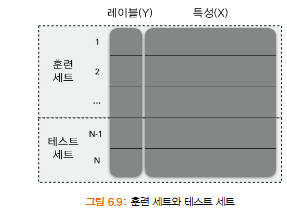

교차검증: 데이터 분할하여 훈련, 검증 세트 구분, 데이터 분할시 독립적으로 동일한 분포라는 가정(Independently and Identically Distributed)

선견 편향? 미래 데이터 포함하여 훈련...

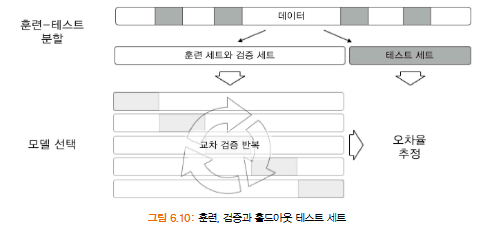

**파이썬으로 교차 검증을 구현하는 방법**

sklearn.model_selection, train_test_split, shuffle, random_state, stratify(훈련, 테스트 세트에 클래스 근사적 동일한 비중)

K 폴드 반복</br>
KFold(n_splits=5)

Leave-one-out method</br>
Leave-P-out CV: 모든 가능한 p개 데이터 행 조합)
ShuffleSplit: 독립적인 분할, 검증 세트 중첩 가능

※ 예전 스터디 자료 참고</br>
https://colab.research.google.com/drive/1lRZUeqGAz04pQsIbnwSDRw_Xz9BPtnTO?authuser=1

**금융에서 교차 검증의 문제**

훈련 표본에 대한 가정은  1)independent(독립적이고), 2)identically distribution(같은 확률분포를) 였으나...

금융데이터는 이분산성(heteroskedsticity)이라고도하는 계열 상관과 시간 가변 표준 편차 때문에 독립적이거나 동일한 분포가 아님</br>
TimeSeriesSplit은 시계열 데이터의 선형 순서를 다루는 것을 목표

<사이킷런을 이용한 시계열 교차 검증>

시계열 교차 검증은 미래 데이터를 사용해 과거 데이터를 예측하는 상황 초래

데이터 스누핑(data snooping): 개발자가 모든 데이터를 이용해서 모델을 학습시키고 평가하여 정확도를 높이기 위해 신경망 모델을 임의로 계속 선택한다면 해당 데이터에 대해서만 최적화를 진행하게 되어 모델이 과대 적합이 될 수 있는데 이는 데이터 스누핑 편향을 초래

TimeSeriesSplit 시간 의존성 해결, 전방 진행 테스트

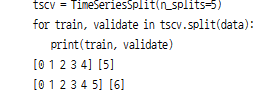

**제거, 엠바고, 조합적 CV**

- purging: 선견편향 방지를 위한 시점에 따라 훈련데이터에서 검증데이터 제거
- embargoing
- combinational CV

https://blog.quantinsti.com/cross-validation-embargo-purging-combinatorial/

https://towardsai.net/p/l/the-combinatorial-purged-cross-validation-method

금융데이터는 shuffling과 k-fold cv 안된다...</br>
https://hisgracehofh.tistory.com/22

프라도 박사 '실전 금융 머신러닝 완벽 분석', 샘플코드</br>
파이썬 lib. timeseriescv

### 6.3 사이킷런을 이용한 파라미터 조정과 옐로우브릭

<검증 곡선: 하이퍼파라미터의 영향을 그래프로 표현>

<학습 곡선: 편향 분산 트레이드오프의 진단>

<그리드서치와 파이프라인을 이용한 파라미터 조정>